In [97]:
headers = ["APS", "ABPS", "SUBARP", "MISS_MAC", "CLASS"]

In [98]:
import csv  # load features-file.csv file and convert it to a list
with open('features-file-2.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    reader = list(reader)

In [99]:
reader

[['0', '6.666666667', '0', '0', '0'],
 ['8', '61.66666667', '24', '0', '0'],
 ['18', '43.33333333', '54', '0', '0'],
 ['23.66666667', '41.33333333', '71', '0', '0'],
 ['37.66666667', '38.33333333', '91', '0', '0'],
 ['52.33333333', '25', '95', '0', '0'],
 ['64.33333333', '25', '103', '0', '0'],
 ['69.33333333', '23.33333333', '92', '0', '0'],
 ['72.66666667', '13.33333333', '70', '0', '0'],
 ['76', '15', '58', '0', '0'],
 ['76.33333333', '3.333333333', '43', '0', '0'],
 ['66.33333333', '5', '39', '0', '0'],
 ['60', '3.333333333', '38', '0', '0'],
 ['49.33333333', '10', '30', '0', '0'],
 ['36.66666667', '8.333333333', '22', '0', '0'],
 ['32.66666667', '5', '20', '0', '0'],
 ['27.33333333', '5', '20', '0', '0'],
 ['22', '5', '20', '0', '0'],
 ['20.33333333', '0', '19', '0', '0'],
 ['18.66666667', '0', '16', '0', '0'],
 ['18', '0', '12', '0', '0'],
 ['16.66666667', '0', '10', '0', '0'],
 ['13.66666667', '0', '5', '0', '0'],
 ['11', '0', '3', '0', '0'],
 ['9', '0', '1', '0', '0'],
 ['7', '

In [100]:
# save them with header to become dataframe
import pandas as pd
df = pd.DataFrame(reader, columns=headers)
#remove the empty row
df = df.dropna()
df

,APS,ABPS,SUBARP,MISS_MAC,CLASS
0,0,6.666666667,0,0,0
1,8,61.66666667,24,0,0
2,18,43.33333333,54,0,0
3,23.66666667,41.33333333,71,0,0
4,37.66666667,38.33333333,91,0,0
...,...,...,...,...,...
4709,55.33333333,75,116,1,1
4710,41.66666667,25,85,1,1
4711,24,18.33333333,48,1,1
4712,11,1.666666667,21,1,1


In [101]:
# drop CLASS column and TIME column
X = df.drop(['CLASS'], axis=1)
X

,APS,ABPS,SUBARP,MISS_MAC
0,0,6.666666667,0,0
1,8,61.66666667,24,0
2,18,43.33333333,54,0
3,23.66666667,41.33333333,71,0
4,37.66666667,38.33333333,91,0
...,...,...,...,...
4709,55.33333333,75,116,1
4710,41.66666667,25,85,1
4711,24,18.33333333,48,1
4712,11,1.666666667,21,1


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, df['CLASS'], test_size=0.2, random_state=0)

In [103]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2828, 4) (1886, 4) (2828,) (1886,)


In [104]:
from sklearn.neural_network import MLPClassifier

In [105]:
model_neural = MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)
# explain hidden_layer_sizes: 3 layers with 13 neurons each layer

In [106]:
print(X_train)

              APS         ABPS SUBARP MISS_MAC
2949  41.66666667            0      1        0
3699  30.66666667  38.33333333     44        0
238            29           20     41        1
2611  35.66666667            0      3        0
427            37            0      1        1
...           ...          ...    ...      ...
1033           31            0     -3        0
3264  15.66666667  11.66666667     25        0
1653  18.33333333  1.666666667      3        0
2607           28            0      0        0
2732  49.33333333  53.33333333     46        0

[2828 rows x 4 columns]


In [107]:
# train the model
MitM_nn = model_neural.fit(X_train, y_train)

In [108]:
# print Score
print("Score: ", MitM_nn.score(X_test, y_test))

Score:  0.971898197242842


In [109]:
predictions = MitM_nn.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predictions': predictions})
results.head()

,Actual,Predictions
1977,1,1
3354,0,0
3495,0,0
2537,0,0
298,1,1


[[1238    1]
 [  52  595]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1239
           1       1.00      0.92      0.96       647

    accuracy                           0.97      1886
   macro avg       0.98      0.96      0.97      1886
weighted avg       0.97      0.97      0.97      1886



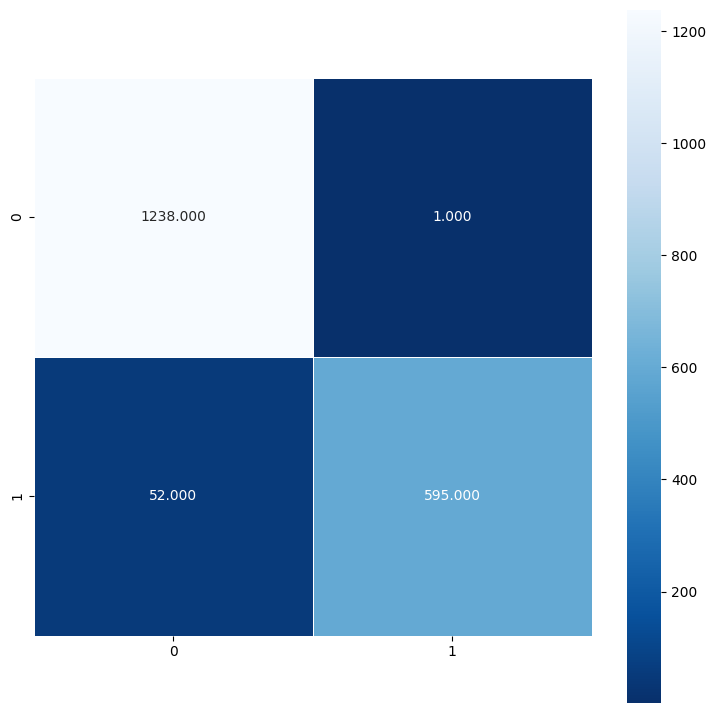

In [110]:
#print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))




In [111]:
# extract the model to pickle file
# import pickle
# pickle.dump(MitM_nn, open('MitM_nn', 'wb'))

--- 0.02193760871887207 seconds ---


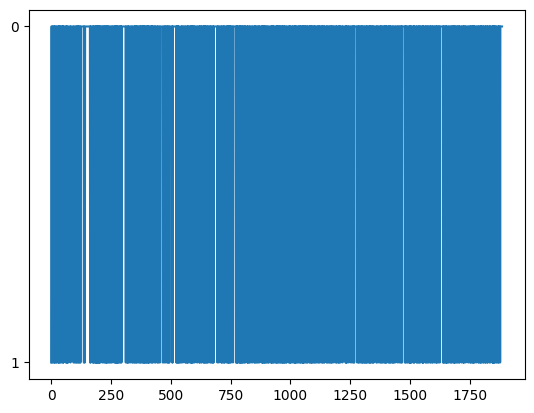

In [112]:
#visualize the time response of the model
import time
start_time = time.time()
MitM_nn.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
from matplotlib import pyplot as plt
plt.plot(MitM_nn.predict(X_test))


In [113]:
#visualize the data to compare data of CLASS = 1 and CLASS = 0
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

headers = ["APS", "ABPS", "SUBARP", "MISS_MAC", "CLASS"]

import pandas as pd
df = pd.DataFrame(reader, columns=headers)

df.groupby('CLASS').describe()



APS                           ABPS                  SUBARP             \
      count unique          top freq count unique top  freq  count unique top   
CLASS                                                                           
0      3099    186  30.66666667   77  3099    107   0  1708   3099    122   0   
1      1615    174           27   49  1615     81   0   868   1615    109   1   

            MISS_MAC                   
       freq    count unique top  freq  
CLASS                                  
0      1199     3099      1   0  3099  
1       517     1615      2   1  1495

In [114]:
#visualize the data to compare APS of CLASS = 1 and CLASS = 0
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

headers = ["APS", "ABPS", "SUBARP", "MISS_MAC", "CLASS"]

import pandas as pd
df = pd.DataFrame(reader, columns=headers)

APS_diff = df.groupby('CLASS')['APS'].describe()
APS_diff
# mean_APS_class_1 = APS_diff['mean'][1]
# print(mean_APS_class_1)
# mean_APS_class_0 = APS_diff['mean'][0]
# print(mean_APS_class_0)

,count,unique,top,freq
CLASS,,,,
0,3099,186,30.66666667,77
1,1615,174,27,49


In [ ]:
import tensoflow as tf